# Introduction II

# Table of contents

1. [Random Number Extraction](#random_number_extraction)\
    1.1 [Extraction from a Standard Normal Distribution](#extraction)\
    1.2 [Histogram of the Extracted Values](#hist)\
    1.3 [Histogram of the Distribution of the Extracted Values](#norm_hist)\
    1.4 [Normal Fit of the Distribution of the Extracted Values](#fit)

These are our preliminary imports to load functionalities not included in the Python Standard Library

In [1]:
import numpy as np

Plotting functionalities can be imported in the [Matplotlib](https://matplotlib.org/) Python plotting library. Importing only the `pylab` module is standard and will be enough for our examples too.

In [2]:
import matplotlib.pylab as plt

To request inline plots to the Jupyter Notebook engine, we use the following directive:

In [3]:
%matplotlib inline

Statistical functions are defined in `scipy` library

In [4]:
from scipy import stats

Notice in particular the syntax `from scipy import stats`. This is a case of a package `scipy` from which we decide to load only the `stats` module. Then we can access functions defined in `stats` as usual: `stats.functionName()`

# 1. Random Number Extraction <a name="random_number_extraction"></a>

The following sections are organized as follows: 
- In Sec. [1.1](#extraction) we generate $N$ samples from a Standard Normal Distribution (that is, a [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution) with mean $\mu=0$ and standard deviation $\sigma=1$) and visualize the array of extracted values.
- In Sec. [1.2](#hist) we plot a histogram of the extracted values.
- In Sec. [1.3](#norm_hist) we plot a histogram of the empirical distribution of the extracted values. 
- Finally, in Sec. [1.4](#fit), we fit a Normal distribution to the extracted values and compare the empirical distribution with the Normal fit to check whether the extracted values are really normally distributed.

(spoiler: they are _almost_ normally distributed...). 

## 1.1 Extraction from a Standard Normal Distribution <a name="extraction"></a>

The Numpy `random` module contains functionalities to generate random samples. By default it uses a [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister) pseudo-random number generator ([PRNG](https://www.geeksforgeeks.org/pseudo-random-number-generator-prng/)).

A PRNG is initialized by a _seed_. Once the seed is set, the PRNG will produce always the same random sequence of numbers. For us is thus important to set the seed to have reproducible results (e.g. to check errors in our code). 

In [5]:
seed = np.random.seed(19680801)

The particular value used to set the seed of the PRNG (here 19680801) is subject of research because it has impact on the quality of the random sequence generated by the PRNG (e.g. on its [_period_](https://www.geeksforgeeks.org/pseudo-random-number-generator-prng/), that is the length of the random sequence after which the PRNG starts to repeat itself). Thus, don't change it unless you have a very sound reason to do it.  

Now, we set how many pseudo-random numbers we want to generate: $N=10^5$

In [6]:
N = 100000

To generate the numbers we simply call the `standard_normal` function defined in the `random` module of `Numpy`

In [7]:
z = np.random.standard_normal(N)

We can visualize the extracted values $z$ using the plotting functionalities of the imported [`matplotlib.pylab` module](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.plot.html)

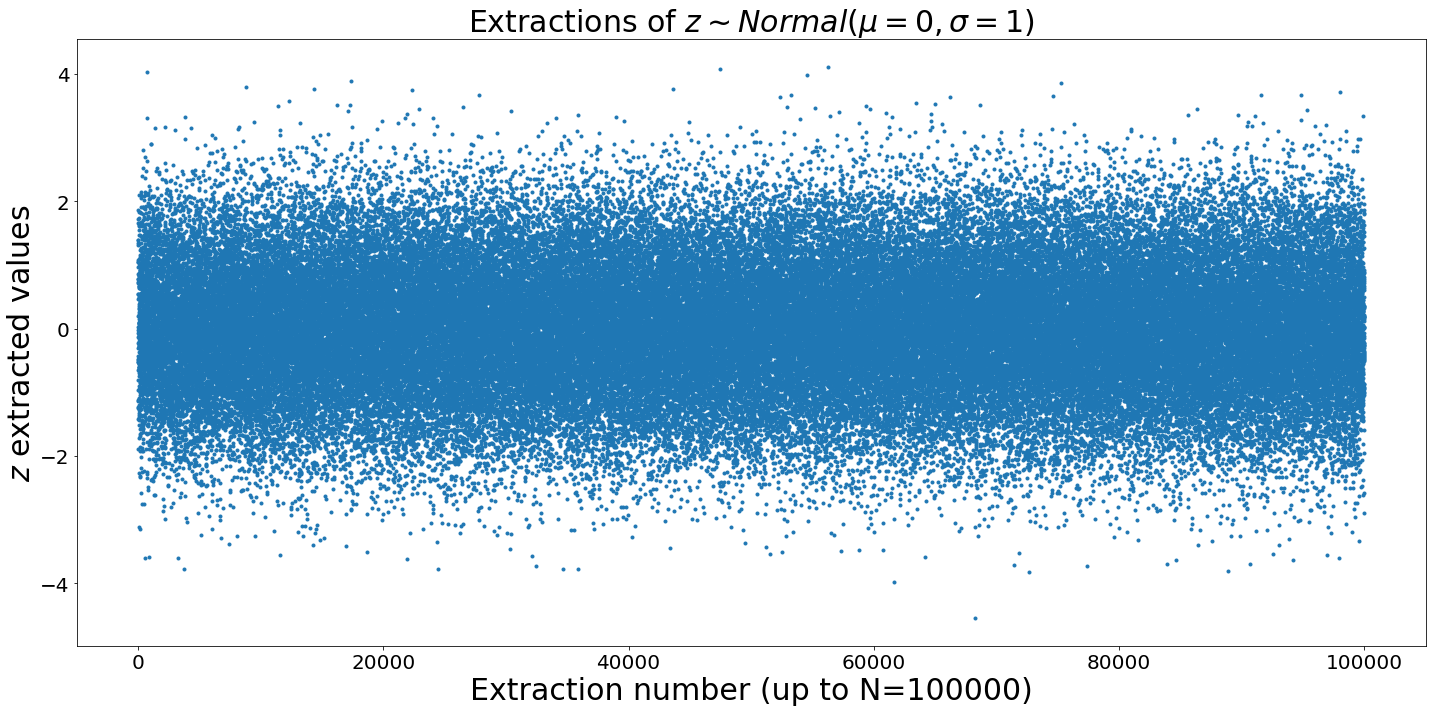

In [8]:
# fig and ax are instances of plot-like objects. 
# These objects have functionalities that allow us to modify/specify features of plot 
# (e.g. the x- and y-axis labels, the title, and so forth...) 
fig, ax = plt.subplots(figsize=(20,10))

# The plot fuction actually draws the plot of z values. 
# The argument 'marker' set the kind of marker of the plot: '.' is for dots markers
# linestyle="" simply avoid the dots to be connected by lines (remove it and re-run and see that the dots become connected)
plt.plot(z, marker='.', linestyle="")

# The ax objects has two sub-objects xaxis and yaxis that give us acces to functionalities of the x-axis and y-axis respctively.
# Here, we set size of the labels of the ticks of the two axis (e.g. 4, 2, 0, -2, -4 for the y-axis).
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

# Here we set the labels of the two axis, providing a text string and the desired size of the font 
ax.set_xlabel('Extraction number (up to N={})'.format(N), fontsize=30) 
ax.set_ylabel('$z$ extracted values', fontsize=30) 

# Here we set the title of the plot
ax.set_title(r'Extractions of $z \sim Normal(\mu=0, \sigma=1)$', fontsize=30) 

# Here we just improve the apperance of the plot, tweaking the spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

By default, `plt.plot(z,...)` plots the values of the $z$ array against its index. That is, against an array of integer values rangin from 0 and ending to `len(z) - 1` (here `len(z) == N`). 

Qualitatively, we see a cloud of points, more dense around 0 and less at greater and smaller values. This is something we expect, since we extracted these values from a Standard Normal Distribution.

## 1.2 Histogram of the Extracted Values <a name="hist"></a>

Now we draw a histogram of the $z$ values extracted. 

First we set the number of bins, that is the number of intervals in which we partition the extracted values.

In [9]:
num_bins = 50

An histogram will then simply be a plot where:
- on the x-axis there are the extracted values partitioned in bins;
- on the y-axis there are the counts in each bin, that is how many values fall within the range of each single bin

Feel the need to refresh the concept of histogram? This is a good time to do it and [Wikipedia](https://en.wikipedia.org/wiki/Histogram), as always, is there to help. 

We use the [`hist` function](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.hist.html), provided by the `matplotlib` library, to actually make the plot. 

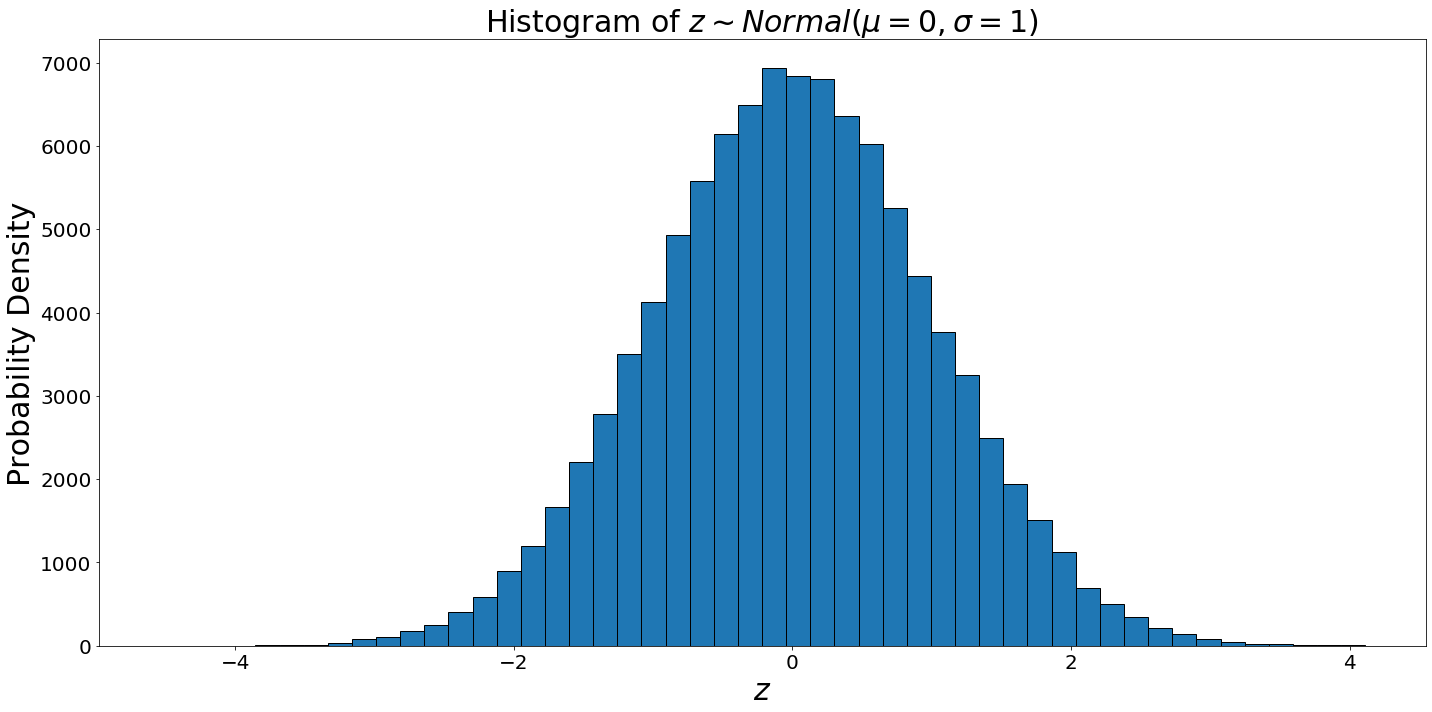

In [10]:
fig, ax = plt.subplots(figsize=(20,10))

# This is the only new piece of code: the histogram of the z values is actually drwan here.
# histtype='bar' simply says that we want an histogram made of (vertical) bars. 
# Different styles can be chosen, take a look at hist's documentation.
# ec='black' simply display in black the borders of the bars.
heights, _, _ = ax.hist(z, num_bins, histtype='bar', ec='black')

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_xlabel('$z$', fontsize=30) 
ax.set_ylabel('Probability Density', fontsize=30) 

ax.set_title(r'Histogram of $z \sim Normal(\mu=0, \sigma=1)$', fontsize=30) 

fig.tight_layout()
plt.show()

To understand the syntax of `heights, _, _ = ax.hist(z, ...)` simply consider that the elements of an array in Python can be assigned directly to variables. For example this can be done:

In [11]:
a, b, c = np.array([10, 20, 30])

print(a)
print(b)
print(c)

10
20
30


Now, function `hist` returns an array of 3 values. We capture the first element only and assign it to the variable `heights` while we skip the capture of the other 2 using the underscores `_` character. This means that the other two outputs of [`hist` function](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.hist.html) will be intentionally lost.

The variable `heights` is itself an array of length `num_bins == 50` representing the _height_ of each single bin. 

How do I know this? Easy! Take a look at _Returns_ section of [`hist` function](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.hist.html)'s documentation for the meaning of its output and at _Parameters_ section for its arguments.

In [12]:
heights

array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.100e+01, 1.400e+01,
       1.500e+01, 3.800e+01, 7.600e+01, 1.020e+02, 1.730e+02, 2.550e+02,
       4.010e+02, 5.890e+02, 8.970e+02, 1.197e+03, 1.670e+03, 2.203e+03,
       2.778e+03, 3.500e+03, 4.128e+03, 4.933e+03, 5.577e+03, 6.146e+03,
       6.490e+03, 6.931e+03, 6.836e+03, 6.801e+03, 6.354e+03, 6.019e+03,
       5.249e+03, 4.443e+03, 3.767e+03, 3.244e+03, 2.488e+03, 1.942e+03,
       1.510e+03, 1.128e+03, 6.990e+02, 5.050e+02, 3.480e+02, 2.110e+02,
       1.420e+02, 8.300e+01, 4.700e+01, 2.300e+01, 1.700e+01, 9.000e+00,
       5.000e+00, 4.000e+00])

In [13]:
len(heights)

50

Let's label the bins with the index the index $i=0,...,\text{num_bins}-1$ (in our case `num_bins == 50`) and let the array $h_i$ represent the height of bin $i$:

$$h_0, ..., h_{\text{num_bins}-1}$$

By definition of histogram, the sum of the heigts $h_i$ in each single bin $i$ must be equal to the total numbers extracted (in this case `N == 100000`)

$$\text{SUM OF BIN HEIGHTS} = \sum_{i=0}^{\text{num_bins}-1} h_i = N$$

which allow us to legitimately interpret the height of each bin as the counts of $z$ values falling in that bin:

$$h_i : \text{count of the number of $z$ values extracted that fall in the $i$-th bin}$$

Let's check whether this is `True` or `False` using the function `sum`, defined in Numpy:

In [15]:
np.sum(heights) == N

True

Notice the use of the `==` operator which is an operator that check whether the two arguments on its sides are equal. It returns as output a boolean variable `True` or `False`.

## 1.3 Histogram of the Distribution of the Extracted Values <a name="norm_hist"></a>

Let's now draw a histogram of the empirical distribution of the $z$ values extracted. 

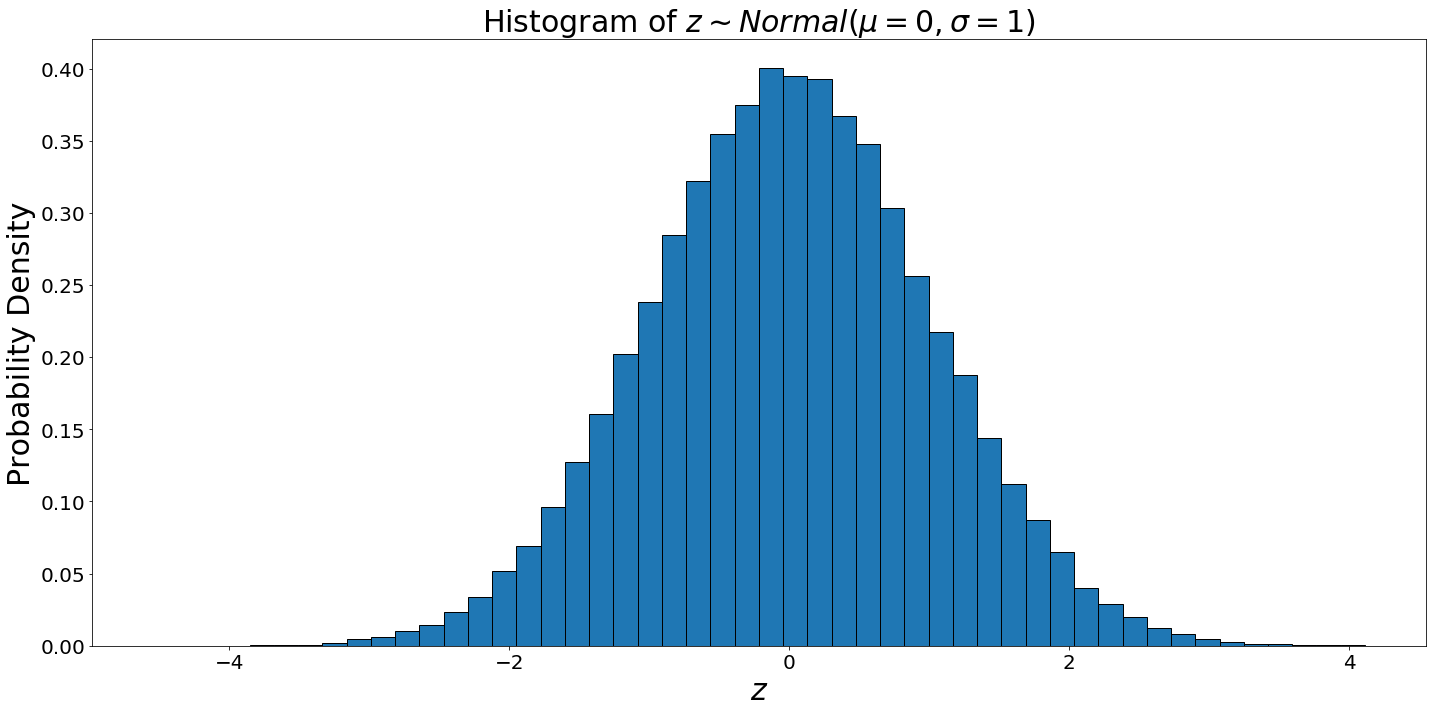

In [17]:
fig, ax = plt.subplots(figsize=(20,10))

# This is the only new piece of code: the normalized histogram of the z values is actually drwan here.
# density=True sepcifies that we want a normalized histogram (see below)
# bin_edges is an array of num_bins + 1 values representing the edges (from left to right) of the bins
heights, bin_edges, _ = ax.hist(z, num_bins, density=True, histtype='bar', ec='black')

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_xlabel('$z$', fontsize=30) 
ax.set_ylabel('Probability Density', fontsize=30) 

ax.set_title(r'Histogram of $z \sim Normal(\mu=0, \sigma=1)$', fontsize=30) 

fig.tight_layout()
plt.show()

We can see that the edges of the bins (wich are automatically chosen by the `hist` function) qualitatively span the range of $z$ values generated (roughly from -4 to 4). 

The second output of `hist` function, captured by `bin_edges` variable, is an array $be_i$ of `num_bins + 1 == 51` values: 

$$be_0, ..., be_{\text{num_bins}}$$

ordered in ascending order. Array $be_i$ represents the edges of the bins ($\text{num_bins}$ left edges and the right edge of last bin). Again, see [`hist` function](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.hist.html)'s documentation for details.

In [18]:
bin_edges

array([-4.54742569, -4.37422251, -4.20101933, -4.02781615, -3.85461297,
       -3.68140979, -3.50820661, -3.33500343, -3.16180025, -2.98859707,
       -2.81539389, -2.64219071, -2.46898753, -2.29578435, -2.12258117,
       -1.94937799, -1.77617481, -1.60297163, -1.42976845, -1.25656527,
       -1.08336209, -0.91015891, -0.73695573, -0.56375255, -0.39054937,
       -0.21734619, -0.04414301,  0.12906017,  0.30226335,  0.47546653,
        0.64866971,  0.82187289,  0.99507607,  1.16827925,  1.34148243,
        1.51468561,  1.68788879,  1.86109197,  2.03429515,  2.20749833,
        2.38070151,  2.55390469,  2.72710787,  2.90031105,  3.07351423,
        3.24671741,  3.41992059,  3.59312377,  3.76632695,  3.93953013,
        4.11273331])

In [22]:
len(bin_edges)

51

Noticed the parameter `density=True` of `hist`? This specifies that we want a _normalized_ histogram, that is a histogram in which the area under the histogram sums to 1. We can check whether this is true.

Let's define as $bw_i$ the width of the $i$-th bin:

$$ bw_i = be_{i+1} - be_{i}$$

therefore, there will be $\text{num_bins}$ bind widths (as many as the bins of course)

$$bw_0, ..., bw_{\text{num_bins}-1}$$

Bin widths array `bin_widths` can be easily computed in Python _slicing_ the `bin_edges` array:

In [23]:
bin_widths = bin_edges[1:] - bin_edges[:-1]

where:
- `bin_edges[1:]` is a slice of the array `bin_edges` from the 2nd element to the last one
- `bin_edges[:-1]` is a slice of the array `bin_edges` from the 1st element to the next to the last

Take a look at [Numpy Quickstart Tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html#indexing-slicing-and-iterating) for more informations on array indexing and slicing. More on this in a future lesson.

In [24]:
len(bin_widths)

50

In [25]:
bin_widths

array([0.17320318, 0.17320318, 0.17320318, 0.17320318, 0.17320318,
       0.17320318, 0.17320318, 0.17320318, 0.17320318, 0.17320318,
       0.17320318, 0.17320318, 0.17320318, 0.17320318, 0.17320318,
       0.17320318, 0.17320318, 0.17320318, 0.17320318, 0.17320318,
       0.17320318, 0.17320318, 0.17320318, 0.17320318, 0.17320318,
       0.17320318, 0.17320318, 0.17320318, 0.17320318, 0.17320318,
       0.17320318, 0.17320318, 0.17320318, 0.17320318, 0.17320318,
       0.17320318, 0.17320318, 0.17320318, 0.17320318, 0.17320318,
       0.17320318, 0.17320318, 0.17320318, 0.17320318, 0.17320318,
       0.17320318, 0.17320318, 0.17320318, 0.17320318, 0.17320318])

We see that the bins, which are chosen for us by `hist` function, have fixed width.

The normalized histogram condition is:


$$
\text{AREA UNDER HISTOGRAM} = \sum_{i=0}^{\text{num_bins}-1} \text{AREA $i$-th BIN RECTANGLE} \\
= \sum_{i=0}^{\text{num_bins}-1} \text{$i$-th BIN HEIGHT} \times \text{$i$-th BIN BASE}  = \sum_{i=0}^{\text{num_bins}-1} h_i \times bw_i = 1
$$

that in Python is

In [26]:
sum(heights * bin_widths)

1.0

## 1.4 Normal Fit of the Distribution of the Extracted Values <a name="fit"></a>

In [ ]:
mu, sigma = stats.norm.fit(z) # get mean and standard deviation

In [ ]:
mu, sigma

In [ ]:
# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
zmin, zmax = min(z), max(z)  
z_linspaced = np.linspace(zmin, zmax, N)

In [ ]:
pdf_z = stats.norm.pdf(z_linspaced, mu, sigma) # now get theoretical values in our interval  

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax.hist(z, num_bins, density=True, histtype='bar', ec='black')
ax.plot(z_linspaced, pdf_z, '--', lw=7)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.set_xlabel('$z$', fontsize=30) 
ax.set_ylabel('Probability Density', fontsize=30) 

ax.set_title(r'Histogram of $z \sim Normal(\mu={0:.3f}, \sigma={0:.3f})$'.format(mu, sigma), fontsize=30) 

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()